In [41]:
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc

# Create a Engine object which is our handle into the database.
engine = create_engine('sqlite:///../world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata from the existing database.
#  Since the database already exists and has tables defined, we can create Python objects based on these automatically.
DBInfo=MetaData(engine)

In [49]:
#Question 1 (5 points):
# What is the country with the latest year (most recent) of independence?
## Palau

#Provide your answer (2 points) and the code used to get that answer (3 points). #The code can either be SQL or SQLAlchemy code.

#Gives the country with the LATEST independece year : SELECT Name, IndepYear FROM country ORDER BY IndepYear DESC LIMIT 1;
# Auto-create the country object basedon the metadata read into the DBInfo.
country=Table('country', DBInfo, autoload=True)

# Mirroring this command: SELECT Id, Name, Population FROM country LIMIT 10;
query=select([country.c.Name, country.c.IndepYear])\
             .order_by(desc(country.c.IndepYear))\
             .limit(1)
result = conn.execute(query)
for row in result:
    print(row)

('Palau', 1994)


In [ ]:
#Question 2 (5 points):
#Refer to this page: https://www.statista.com/chart/11430/the-worlds-youngest-countries/ (Links to an external site.)

#According to this, there are several countries that have become independent since the country in your answer to question 1.

#Pick one of those newer countries and using Wikipedia, or another source, add as much data to the country table as you can for that country.
#Do not spend a lot of time trying to find all the data. One or two additional items beyond Name and IndepYear is fine.
#Provide either a SQL INSERT statement or a SQLAlchemy insert statement to add the data for a new country into the database.

#Insert DATA for South Sudan : PRAGMA foreign_keys = ON; 
#INSERT INTO 'country' VALUES ('SSO','South Sudan', 'Africa', 'East-Central Africa', '619745', '2011', '12000000', '-','-','-','-','-','-','-','-');


In [51]:
print(country.insert())

INSERT INTO country ("Code", "Name", "Continent", "Region", "SurfaceArea", "IndepYear", "Population", "LifeExpectancy", "GNP", "GNPOld", "LocalName", "GovernmentForm", "HeadOfState", "Capital", "Code2") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


In [52]:
#Insert DATA for South Sudan
SUDAN_insert=country.insert().values(Code='SSO', Name='South Sudan', Continent='Africa', Region='East-Central Africa', SurfaceArea='619745',IndepYear='2011', Population=12000000)
print(SUDAN_insert)

INSERT INTO country ("Code", "Name", "Continent", "Region", "SurfaceArea", "IndepYear", "Population") VALUES (?, ?, ?, ?, ?, ?, ?)


In [53]:
SUDAN = conn.execute(SUDAN_insert)

In [54]:
query=select([country.c.Name, country.c.IndepYear, country.c.Population]).where(country.c.Name.like('South Sudan%'))
result = conn.execute(query)
for row in result:
    print(row)

('South Sudan', 2011, 12000000)


In [56]:
#Question 3 (5 points):
#For the country added in question 2, find 2 cities to add to the cities table of the database and provide the SQL or SQLAlchemy insert statement to add this data.

#PRAGMA foreign_keys = ON;
#INSERT INTO `city` VALUES (4080, 'Abyei','SS', 'Abyei Area', '20000');
#INSERT INTO `city` VALUES (4081, 'Aweil', 'SS', 'Aweil State', '100000');

# Auto-create the country object basedon the metadata read into the DBInfo.
city=Table('city', DBInfo, autoload=True)



In [57]:
print(city.insert())

INSERT INTO city ("ID", "Name", "CountryCode", "District", "Population") VALUES (?, ?, ?, ?, ?)


In [61]:
#Insert DATA for South Sudan cities
SUDAN_CITY_1_insert=city.insert().values(ID='4080',Name='Abyei',CountryCode='SSO', District='Abyei Area', Population=20000)
SUDAN_CITY_2_insert=city.insert().values(ID='4081',Name='Aweil',CountryCode='SSO', District='Aweil State', Population=100000)

print(SUDAN_CITY_1_insert)
print(SUDAN_CITY_2_insert)

INSERT INTO city ("ID", "Name", "CountryCode", "District", "Population") VALUES (?, ?, ?, ?, ?)
INSERT INTO city ("ID", "Name", "CountryCode", "District", "Population") VALUES (?, ?, ?, ?, ?)


In [62]:
SUDAN_CITY_1 = conn.execute(SUDAN_CITY_1_insert)
SUDAN_CITY_2 = conn.execute(SUDAN_CITY_2_insert)

In [63]:
query=select([city.c.ID, city.c.Name, city.c.District, city.c.Population]).where(city.c.Name.like('Abyei%'))
result = conn.execute(query)
for row in result:
    print(row)
    
query=select([city.c.ID, city.c.Name, city.c.District, city.c.Population]).where(city.c.Name.like('Aweil%'))
result = conn.execute(query)
for row in result:
    print(row)

(4080, 'Abyei', 'Abyei Area', 20000)
(4081, 'Aweil', 'Aweil State', 100000)


In [68]:
#Question 4 (5 points):
#Grad Students Only; Undergrads get 5 points free, but can earn 5 points extra credit points for doing this question
#Using the LifeExpectancy data in the country table on the y-axis, plot this data against some other value.

#Suggestions for the x-axis: GNP, Population or IndepYear could be interesting, but up to you.
#I'd suggest using SQLAlchemy, get the data and make either a dataframe or numpy arrays and then use matplotlib to plot.

import pandas as pd
import sqlite3

# Read in SQLite databases
con = sqlite3.connect("/home/sarmikasoglou.ef/world.sqlite")

#Read the Table
DATA = pd.read_sql_query("SELECT LifeExpectancy, GNP from country", con)

#close the connection
con.close()


In [69]:
print(DATA)
#print(DATA.describe())

     LifeExpectancy       GNP
0              78.4     828.0
1              45.9    5976.0
2              38.3    6648.0
3              76.1      63.2
4              71.6    3205.0
..              ...       ...
235            72.4   17000.0
236            51.1  116729.0
237            37.2    3377.0
238            37.8    5951.0
239             NaN       NaN

[240 rows x 2 columns]


<AxesSubplot:xlabel='GNP', ylabel='LifeExpectancy'>

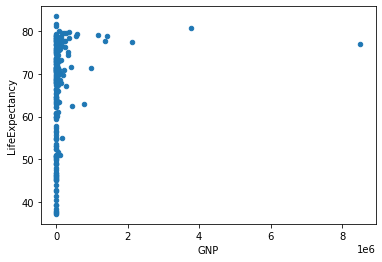

In [70]:
import numpy
import matplotlib.pyplot as plt

DATA.plot.scatter(x='GNP', 
                  y='LifeExpectancy')